In [10]:
import numpy as np
from src.plots import plot_class_score
from src.datasets import JetNetDataset
from src.train import ModelClassifierTest
from src.utils import GetConfigs
from src.architectures import DeepSets as deepsets

In [11]:
from src.utils import make_dir, save_configs

from cards.models import DeepSetsConfig as config
model = deepsets(model_config=config)
config.workdir = make_dir('tops.DeepSets.test', sub_dirs=['results'], overwrite=False)
save_configs(configs=[config], filename=config.workdir+'/configs.json')

model

#==============================================
INFO: created directory: tops.DeepSets.test__1
#==============================================
INFO: saved model configs to tops.DeepSets.test__1/configs.json


DeepSets(
  (criterion): CrossEntropyLoss()
  (wrapper): _DeepSets(
    (phi): Sequential(
      (0): Linear(in_features=5, out_features=256, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=256, out_features=256, bias=True)
      (3): LeakyReLU(negative_slope=0.01)
      (4): Linear(in_features=256, out_features=256, bias=True)
      (5): LeakyReLU(negative_slope=0.01)
      (6): Linear(in_features=256, out_features=256, bias=True)
      (7): LeakyReLU(negative_slope=0.01)
      (8): Linear(in_features=256, out_features=256, bias=True)
      (9): LeakyReLU(negative_slope=0.01)
    )
    (rho): Sequential(
      (0): Linear(in_features=512, out_features=256, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=256, out_features=256, bias=True)
      (3): LeakyReLU(negative_slope=0.01)
      (4): Linear(in_features=256, out_features=256, bias=True)
      (5): LeakyReLU(negative_slope=0.01)
      (6): Linear(in_features=256,

In [9]:

datasets = JetNetDataset(dir_path = 'data/', 
                        datasets = config.datasets,
                        class_labels = config.labels,
                        num_jets = config.size,
                        preprocess = config.preprocess,
                        particle_features = config.features,
                        )

classifier = ModelClassifierTest(classifier = model, 
                                datasets = datasets,
                                split_fractions = config.split_fractions,
                                epochs = config.epochs, 
                                lr = config.lr, 
                                early_stopping = config.early_stopping,
                                workdir = config.workdir,
                                seed = config.seed)

classifier.dataloader(batch_size=config.batch_size)

INFO: loading and preprocessing data...
	- model 0: flow_midpoint  [fm_tops150_cond_mp200nfe.h5, etaphipt]  shape: torch.Size([266920, 150, 6])
	- model 1: diff_midpoint  [midpoint_100_csts.h5, etaphipt_frac]  shape: torch.Size([266920, 150, 6])
	- test : jetnet150  [t150.hdf5, particle_features]  shape: torch.Size([177945, 150, 6])
INFO: building dataloaders...
INFO: train/val/test split ratios: 0.5/0.2/0.3


In [87]:
for batch in classifier.test_loader:
    print(batch['label'])
    B= batch['particle_features']
    A0 = batch['particle_features'][batch['label']==0]
    A1 = batch['particle_features'][batch['label']==1]
    Am1 = batch['particle_features'][batch['label']==-1]
    break

tensor([-1,  1,  0,  ...,  1,  1,  0])


In [88]:
B[0][:3], B[1][:3], B[2][:3]

(tensor([[-4.3662e-05, -1.5080e-04,  5.4929e-02,  2.6246e-01,  5.5359e-02],
         [-6.2099e-05,  2.7866e-04,  3.9252e-02,  4.3923e-01,  3.9763e-02],
         [-4.5138e-05, -1.5765e-04,  3.1545e-02,  2.7304e-01,  3.1803e-02]]),
 tensor([[3.2236e-06, 3.9527e-05, 1.6088e-01, 5.3011e-02, 1.6133e-01],
         [4.7871e-06, 3.6979e-05, 6.1353e-02, 5.1768e-02, 6.1526e-02],
         [1.4861e-06, 2.3629e-05, 5.6503e-02, 3.1309e-02, 5.6659e-02]]),
 tensor([[-1.8606e-06, -5.0154e-05,  8.9262e-02,  6.5672e-02,  8.9509e-02],
         [-2.6246e-05,  1.1463e-04,  4.0552e-02,  1.8227e-01,  4.0738e-02],
         [-1.8766e-06, -3.3554e-05,  3.5393e-02,  4.4292e-02,  3.5491e-02]]))

In [90]:
Am1[0][:3], A1[0][:3], A0[0][:3], 

(tensor([[-4.3662e-05, -1.5080e-04,  5.4929e-02,  2.6246e-01,  5.5359e-02],
         [-6.2099e-05,  2.7866e-04,  3.9252e-02,  4.3923e-01,  3.9763e-02],
         [-4.5138e-05, -1.5765e-04,  3.1545e-02,  2.7304e-01,  3.1803e-02]]),
 tensor([[3.2236e-06, 3.9527e-05, 1.6088e-01, 5.3011e-02, 1.6133e-01],
         [4.7871e-06, 3.6979e-05, 6.1353e-02, 5.1768e-02, 6.1526e-02],
         [1.4861e-06, 2.3629e-05, 5.6503e-02, 3.1309e-02, 5.6659e-02]]),
 tensor([[-1.8606e-06, -5.0154e-05,  8.9262e-02,  6.5672e-02,  8.9509e-02],
         [-2.6246e-05,  1.1463e-04,  4.0552e-02,  1.8227e-01,  4.0738e-02],
         [-1.8766e-06, -3.3554e-05,  3.5393e-02,  4.4292e-02,  3.5491e-02]]))

In [92]:
path = 'tops.DeepSets.5feats.2class.1024batch.0.001lr'
config = GetConfigs(path=path + '/configs.json')
model = deepsets(model_config=config)
ref_class = 'flow_midpoint'

model

DeepSets(
  (criterion): CrossEntropyLoss()
  (wrapper): _DeepSets(
    (phi): Sequential(
      (0): Linear(in_features=5, out_features=128, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=128, out_features=128, bias=True)
      (3): LeakyReLU(negative_slope=0.01)
    )
    (rho): Sequential(
      (0): Linear(in_features=256, out_features=128, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=128, out_features=128, bias=True)
      (3): LeakyReLU(negative_slope=0.01)
      (4): Linear(in_features=128, out_features=2, bias=True)
      (5): LeakyReLU(negative_slope=0.01)
    )
  )
)

In [93]:

datasets = JetNetDataset(dir_path = 'data/', 
                        datasets = config.datasets,
                        class_labels = config.labels,
                        num_jets = config.size,
                        preprocess = config.preprocess,
                        particle_features = config.features,
                        )

classifier = ModelClassifierTest(classifier = model, 
                                datasets = datasets,
                                split_fractions = config.split_fractions,
                                epochs = config.epochs, 
                                lr = config.lr, 
                                early_stopping = config.early_stopping,
                                workdir = config.workdir,
                                seed = config.seed)

classifier.dataloader(batch_size=config.batch_size)


INFO: loading and preprocessing data...
	- model 0: flow_midpoint  [fm_tops150_cond_mp200nfe.h5, etaphipt]  shape: torch.Size([266920, 150, 6])
	- model 1: diff_midpoint  [midpoint_100_csts.h5, etaphipt_frac]  shape: torch.Size([266920, 150, 6])
	- test : jetnet150  [t150.hdf5, particle_features]  shape: torch.Size([177945, 150, 6])
INFO: building dataloaders...
INFO: train/val/test split ratios: 0.5/0.2/0.3


In [94]:
classifier.load_model(path=path + '/best_model.pth')
classifier.test(class_labels=config.labels)

testing:   0%|          | 0/209 [00:00<?, ?it/s]

In [99]:
classifier.predictions, classifier.log_posterior

({'datasets': tensor([[ 9.0986e-01,  9.0139e-02,  0.0000e+00],
          [ 9.9998e-01,  2.2712e-05, -1.0000e+00],
          [ 9.9078e-01,  9.2219e-03, -1.0000e+00],
          ...,
          [ 9.9197e-01,  8.0287e-03,  1.0000e+00],
          [ 9.8111e-01,  1.8892e-02,  0.0000e+00],
          [ 9.9652e-01,  3.4764e-03, -1.0000e+00]]),
  0: tensor([[9.0986e-01, 9.0139e-02],
          [1.0000e+00, 4.4971e-06],
          [9.9873e-01, 1.2652e-03],
          ...,
          [9.9999e-01, 5.3965e-06],
          [9.9864e-01, 1.3598e-03],
          [9.8111e-01, 1.8892e-02]]),
  1: tensor([[9.9877e-01, 1.2274e-03],
          [9.9125e-01, 8.7490e-03],
          [9.8974e-01, 1.0264e-02],
          ...,
          [9.9987e-01, 1.3177e-04],
          [9.9962e-01, 3.8279e-04],
          [9.9197e-01, 8.0287e-03]]),
  -1: tensor([[9.9998e-01, 2.2712e-05],
          [9.9078e-01, 9.2219e-03],
          [9.9992e-01, 8.2656e-05],
          ...,
          [9.4935e-01, 5.0652e-02],
          [9.9986e-01, 1.3855e

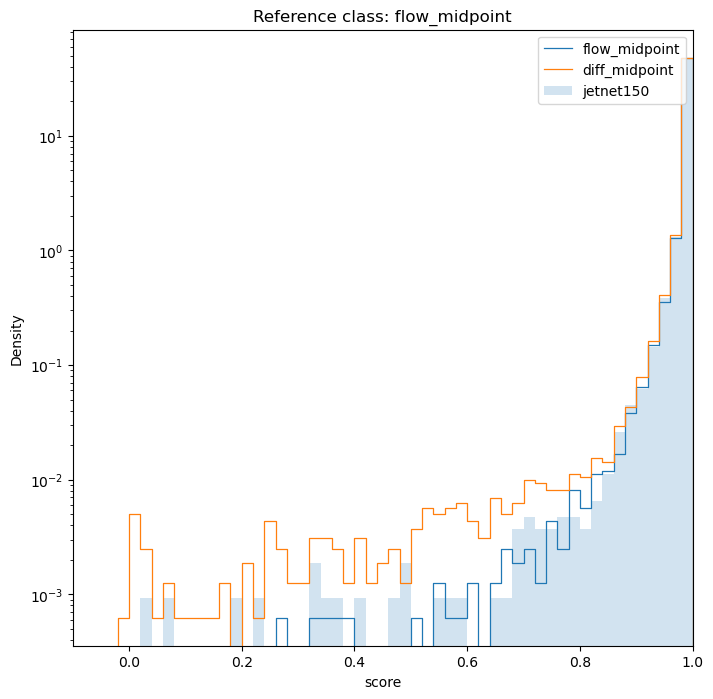

In [97]:
plot_class_score(predictions=classifier.predictions,
                class_labels=config.labels,
                reference='flow_midpoint',
                workdir=config.workdir+'/results',
                figsize=(8,8), 
                xlim=(-.1,1), 
                lw=0.9,
                density=True,
                bins=np.arange(-0.1, 1.03, 0.02),
                legend_loc='upper right'
                )

In [7]:
classifier.predictions[1]

tensor([[9.9993e-01, 6.7004e-05],
        [9.9991e-01, 9.0694e-05],
        [9.9583e-01, 4.1745e-03],
        ...,
        [9.9996e-01, 3.9049e-05],
        [9.9964e-01, 3.5948e-04],
        [9.9998e-01, 2.3035e-05]])

In [ ]:
# class JetNetPreprocess:
    
#     def __init__(self, 
#                  jet: torch.Tensor=None, 
#                  method: dict=None, 
#                  info: tuple=None):
        
#         self.jet = jet
#         self.dim_features = self.jet.shape[-1] - 1
#         self.method = method
#         self.mean, self.std, self.max, self.min = info
#         self.mask = self.jet[:, -1, None]
#         self.jet_unmask = self.jet[:, :self.dim_features]


#     def standardize(self,  sigma: float=1.0):
#         self.jet_unmask = (self.jet_unmask * self.mean) * (1e-8 + sigma / self.std )
#         self.jet_unmask = self.jet_unmask * self.mask
#         self.jet = torch.cat((self.jet_unmask, self.mask), dim=-1)

#     def normalize(self):
#         self.jet_unmask = (self.jet_unmask - self.min) / ( self.max - self.min )
#         self.jet_unmask = self.jet_unmask * self.mask
#         self.jet = torch.cat((self.jet_unmask, self.mask), dim=-1)
    
#     def logit_tramsform(self, alpha=1e-6):
#         self.jet_unmask = self.logit(self.jet_unmask, alpha=alpha)
#         self.jet_unmask = self.jet_unmask * self.mask
#         self.jet = torch.cat((self.jet_unmask, self.mask), dim=-1)

#     def logit(t, alpha=1e-6):
#         x = alpha + (1 - 2 * alpha) * t
#         return torch.log(x/(1-x))

    # def normalize(self, inverse: bool=False):
    #     mask = self.particles[:, -1].bool()
    #     D = self.dim
    #     if not inverse:
    #         self.max, _ = torch.max(self.particles[..., :D][mask], dim=0, keepdim=True)
    #         self.min, _ = torch.min(self.particles[..., :D][mask], dim=0, keepdim=True)
    #         self.particles[..., :D][mask] = (self.particles[..., :D][mask] - self.min) / (self.max - self.min) 
    #         print('\t- normalizing data')
    #     else:
    #         self.particles[..., :D][mask] = self.particles[..., :D][mask] * (self.max - self.min) + self.min * mask 
    #         print('\t-: un-normalizing data')

    # def preprocess(self, methods: dict={}, name: str='data'):
    #     print('INFO: preprocessing {}'.format(name))
    #     method_items = list(methods.items())  
    #     for method_name, method_kwargs in method_items:
    #         method_kwargs['inverse'] = False
    #         method = getattr(self, method_name, None)
    #         if method and callable(method):
    #             method(**method_kwargs)
    #         else:
    #             print(f"Method {method_name} not found")



# jet = data[0][0]
# info = (torch.Tensor([ 1.8317e-05, -6.5716e-05,  1.5960e-02]), 
#         torch.Tensor([0.1364, 0.1361, 0.0300]), 
#         torch.Tensor([-3.1485e+00, -6.8031e-01,  2.0489e-08]), 
#         torch.Tensor([1.6063, 0.8665, 0.9089]))

# print(jet)
# jet_prepr = JetPreprocess(jet, info=info)
# jet_prepr.standardize(inverse=True, sigma=5.0)
# # print(jet_prepr.jet)
# jet_prepr.jet

# Jet images

# Check distribution of particle features

In [ ]:

# data = JetNetDataLoader(dir_path='data/', 
#                         data_files=DataConfig.sets,
#                         preprocess=None,
#                         num_jets=175000,
#                         num_constituents=30, 
#                         clip_neg_pt=True,
#                         particle_features=['eta_rel', 'phi_rel', 'pt_rel', 'R', 'e_rel']
#                         )

# jetnet = JetNetFeatures(data[2])
# flowmatch_mp = JetNetFeatures(data[0])
# flowmatch_eu = JetNetFeatures(data[1])
# diffusion = JetNetFeatures(data[3])

# bins = Bins(0,1)
# fig, ax = plt.subplots(1, figsize=(5,5))
# jetnet.particle_plot(feature='pt_rel', bins=bins, ax=ax) 
# flowmatch_eu.particle_plot(feature='pt_rel', bins=bins,  fill=False, color='r', ax=ax) 
# flowmatch_mp.particle_plot(feature='pt_rel', bins=bins,  fill=False, color='purple', ax=ax) 
# diffusion.particle_plot(feature='pt_rel', bins=bins, fill=False, color='b', ax=ax) 

# bins = Bins(0,3)
# fig, ax = plt.subplots(1, figsize=(5,5))
# jetnet.particle_plot(feature='R', bins=bins, ax=ax) 
# flowmatch_eu.particle_plot(feature='R', bins=bins,  fill=False, color='r', ax=ax) 
# flowmatch_mp.particle_plot(feature='R', bins=bins,  fill=False, color='purple', ax=ax) 
# diffusion.particle_plot(feature='R', bins=bins, fill=False, color='b', ax=ax) 

# bins = Bins(0,0.8)
# fig, ax = plt.subplots(1, figsize=(5,5))
# jetnet.particle_plot(feature='pt_rel', nth_particle=1, bins=bins, ax=ax) 
# flowmatch_eu.particle_plot(feature='pt_rel', nth_particle=1, bins=bins,  fill=False, color='r', ax=ax) 
# flowmatch_mp.particle_plot(feature='pt_rel', nth_particle=1,bins=bins,  fill=False, color='purple', ax=ax) 
# diffusion.particle_plot(feature='pt_rel', nth_particle=1, bins=bins, fill=False, color='b', ax=ax) 
# plt.title(r'hardest particles in jet')

# bins = Bins(0,0.35)
# fig, ax = plt.subplots(1, figsize=(5,5))
# jetnet.jet_plot(feature='m_rel', bins=bins, ax=ax) 
# flowmatch_eu.jet_plot(feature='m_rel', bins=bins,  fill=False, color='r', ax=ax) 
# flowmatch_mp.jet_plot(feature='m_rel', bins=bins,  fill=False, color='purple', ax=ax) 
# diffusion.jet_plot(feature='m_rel', bins=bins, fill=False, color='b', ax=ax) 

# bins = range(30)
# fig, ax = plt.subplots(1, figsize=(5,5))
# jetnet.jet_plot(feature='multiplicity', bins=bins, ax=ax) 
# flowmatch_eu.jet_plot(feature='multiplicity', bins=bins,  fill=False, color='r', ax=ax) 
# flowmatch_mp.jet_plot(feature='multiplicity', bins=bins,  fill=False, color='purple', ax=ax) 
# diffusion.jet_plot(feature='multiplicity', bins=bins, fill=False, color='b', ax=ax) 

# Preprocess data

In [ ]:
# data = JetNetDataLoader(dir_path='data/',  data_files=DataConfig.sets, preprocess=DataConfig.preprocess, num_jets=175000, num_constituents=30,  clip_neg_pt=True, particle_features=['eta_rel', 'phi_rel', 'pt_rel', 'R', 'e_rel'])

# jetnet = JetNetFeatures(data[2])
# flowmatch_mp = JetNetFeatures(data[0])
# flowmatch_eu = JetNetFeatures(data[1])
# diffusion = JetNetFeatures(data[3])

# bins = Bins(-10,50)
# fig, ax = plt.subplots(1, figsize=(5,5))
# jetnet.particle_plot(feature='pt_rel', bins=bins, ax=ax) 
# flowmatch_eu.particle_plot(feature='pt_rel', bins=bins,  fill=False, color='r', ax=ax) 
# flowmatch_mp.particle_plot(feature='pt_rel', bins=bins,  fill=False, color='purple', ax=ax) 
# diffusion.particle_plot(feature='pt_rel', bins=bins, fill=False, color='b', ax=ax) 

# fig, ax = plt.subplots(1, figsize=(5,5))
# jetnet.particle_plot(feature='R', bins=bins, ax=ax) 
# flowmatch_eu.particle_plot(feature='R', bins=bins,  fill=False, color='r', ax=ax) 
# flowmatch_mp.particle_plot(feature='R', bins=bins,  fill=False, color='purple', ax=ax) 
# diffusion.particle_plot(feature='R', bins=bins, fill=False, color='b', ax=ax) 

# fig, ax = plt.subplots(1, figsize=(5,5))
# jetnet.particle_plot(feature='pt_rel', nth_particle=1, bins=bins, ax=ax) 
# flowmatch_eu.particle_plot(feature='pt_rel', nth_particle=1, bins=bins,  fill=False, color='r', ax=ax) 
# flowmatch_mp.particle_plot(feature='pt_rel', nth_particle=1,bins=bins,  fill=False, color='purple', ax=ax) 
# diffusion.particle_plot(feature='pt_rel', nth_particle=1, bins=bins, fill=False, color='b', ax=ax) 
# plt.title(r'hardest particles in jet')
